# 1. Create tokens

In [1]:
with open('../../dataset/the-verdict.txt') as f:
    raw_text = f.read()

print("Total no. of characters: ", len(raw_text))

print(raw_text[:1000])

Total no. of characters:  20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like

In [5]:
import re

text = "Hello, world. This, is a test."

# Split text on whitespace (\s) while keeping the separators
# The parentheses in (\s) create a capture group that preserves the whitespace
# This splits "Hello, world" into ["Hello", " ", ",", " ", "world"]
result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [7]:
result = [ i for i in result if i.strip()]

print(result)

['Hello,', 'world.', 'This,', 'is', 'a', 'test.']


In [10]:
bool(''.strip()), bool(' '.strip())

(False, False)

In [11]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [16]:
# Lets process the whole dataset
with open('../../dataset/the-verdict.txt') as f:
    raw_text = f.read()

# preprocess the text to remove special characters and split on whitespace
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)

# remove empty strings
preprocessed = [item.strip() for item in preprocessed if item.strip()]

# print the first 10 elements
print(preprocessed[:10])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius']


In [14]:
len(preprocessed)

4690

# 2. Creating Token IDs

In [27]:
all_words = sorted(set(preprocessed))

vocab_size = len(all_words)

print(vocab_size)

1130


In [29]:
vocab = {word: i for i, word in enumerate(all_words)}

for i, word in enumerate(all_words):
    if i < 50:
        print(f"{i}: {word}")

0: !
1: "
2: '
3: (
4: )
5: ,
6: --
7: .
8: :
9: ;
10: ?
11: A
12: Ah
13: Among
14: And
15: Are
16: Arrt
17: As
18: At
19: Be
20: Begin
21: Burlington
22: But
23: By
24: Carlo
25: Chicago
26: Claude
27: Come
28: Croft
29: Destroyed
30: Devonshire
31: Don
32: Dubarry
33: Emperors
34: Florence
35: For
36: Gallery
37: Gideon
38: Gisburn
39: Gisburns
40: Grafton
41: Greek
42: Grindle
43: Grindles
44: HAD
45: Had
46: Hang
47: Has
48: He
49: Her


In [31]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
                                
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [35]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know," 
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [36]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [37]:
## This will throw an error 
# print(tokenizer.encode("Hello, world. This, is a test."))


In [40]:
preprocessed

['I',
 'HAD',
 'always',
 'thought',
 'Jack',
 'Gisburn',
 'rather',
 'a',
 'cheap',
 'genius',
 '--',
 'though',
 'a',
 'good',
 'fellow',
 'enough',
 '--',
 'so',
 'it',
 'was',
 'no',
 'great',
 'surprise',
 'to',
 'me',
 'to',
 'hear',
 'that',
 ',',
 'in',
 'the',
 'height',
 'of',
 'his',
 'glory',
 ',',
 'he',
 'had',
 'dropped',
 'his',
 'painting',
 ',',
 'married',
 'a',
 'rich',
 'widow',
 ',',
 'and',
 'established',
 'himself',
 'in',
 'a',
 'villa',
 'on',
 'the',
 'Riviera',
 '.',
 '(',
 'Though',
 'I',
 'rather',
 'thought',
 'it',
 'would',
 'have',
 'been',
 'Rome',
 'or',
 'Florence',
 '.',
 ')',
 '"',
 'The',
 'height',
 'of',
 'his',
 'glory',
 '"',
 '--',
 'that',
 'was',
 'what',
 'the',
 'women',
 'called',
 'it',
 '.',
 'I',
 'can',
 'hear',
 'Mrs',
 '.',
 'Gideon',
 'Thwing',
 '--',
 'his',
 'last',
 'Chicago',
 'sitter',
 '--',
 'deploring',
 'his',
 'unaccountable',
 'abdication',
 '.',
 '"',
 'Of',
 'course',
 'it',
 "'",
 's',
 'going',
 'to',
 'send',
 't

In [43]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = { i : token for token, i in enumerate(all_tokens)}
vocab

{'!': 0,
 '"': 1,
 "'": 2,
 '(': 3,
 ')': 4,
 ',': 5,
 '--': 6,
 '.': 7,
 ':': 8,
 ';': 9,
 '?': 10,
 'A': 11,
 'Ah': 12,
 'Among': 13,
 'And': 14,
 'Are': 15,
 'Arrt': 16,
 'As': 17,
 'At': 18,
 'Be': 19,
 'Begin': 20,
 'Burlington': 21,
 'But': 22,
 'By': 23,
 'Carlo': 24,
 'Chicago': 25,
 'Claude': 26,
 'Come': 27,
 'Croft': 28,
 'Destroyed': 29,
 'Devonshire': 30,
 'Don': 31,
 'Dubarry': 32,
 'Emperors': 33,
 'Florence': 34,
 'For': 35,
 'Gallery': 36,
 'Gideon': 37,
 'Gisburn': 38,
 'Gisburns': 39,
 'Grafton': 40,
 'Greek': 41,
 'Grindle': 42,
 'Grindles': 43,
 'HAD': 44,
 'Had': 45,
 'Hang': 46,
 'Has': 47,
 'He': 48,
 'Her': 49,
 'Hermia': 50,
 'His': 51,
 'How': 52,
 'I': 53,
 'If': 54,
 'In': 55,
 'It': 56,
 'Jack': 57,
 'Jove': 58,
 'Just': 59,
 'Lord': 60,
 'Made': 61,
 'Miss': 62,
 'Money': 63,
 'Monte': 64,
 'Moon-dancers': 65,
 'Mr': 66,
 'Mrs': 67,
 'My': 68,
 'Never': 69,
 'No': 70,
 'Now': 71,
 'Nutley': 72,
 'Of': 73,
 'Oh': 74,
 'On': 75,
 'Once': 76,
 'Only': 77,
 '

In [44]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [45]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int 
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [49]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [50]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [51]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

In [52]:
!pip3 install tiktoken

  Using cached tiktoken-0.9.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.7 kB)
  Using cached regex-2024.11.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (40 kB)
Using cached tiktoken-0.9.0-cp312-cp312-macosx_11_0_arm64.whl (1.0 MB)
Using cached regex-2024.11.6-cp312-cp312-macosx_11_0_arm64.whl (284 kB)


## Byte Pair Encoding (BPF)

In [57]:
import importlib
import importlib.metadata
import tiktoken

print("tiktoken version :", importlib.metadata.version("tiktoken"))

tiktoken version : 0.9.0


In [61]:
tokenizer = tiktoken.get_encoding('gpt2')


In [67]:
print(f" tokenizer.n_vocab = {tokenizer.n_vocab}\n max_token_value = {tokenizer.max_token_value}")

 tokenizer.n_vocab = 50257
 max_token_value = 50256


In [68]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [69]:
tokenizer.decode(integers)

'Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.'

In [70]:
import tiktoken

# Initialize the encodings for GPT-2, GPT-3, and GPT-4
encodings = {
    "gpt2": tiktoken.get_encoding("gpt2"),
    "gpt3": tiktoken.get_encoding("p50k_base"),  # Commonly associated with GPT-3 models
    "gpt4": tiktoken.get_encoding("cl100k_base")  # Used for GPT-4 and later versions
}

# Get the vocabulary size for each encoding
vocab_sizes = {model: encoding.n_vocab for model, encoding in encodings.items()}

# Print the vocabulary sizes
for model, size in vocab_sizes.items():
    print(f"The vocabulary size for {model.upper()} is: {size}")

The vocabulary size for GPT2 is: 50257
The vocabulary size for GPT3 is: 50281
The vocabulary size for GPT4 is: 100277


### Creating Input-Output Pair

In [71]:
with open('../../dataset/the-verdict.txt') as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [72]:
enc_sample = enc_text[50:]

In [73]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [75]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [82]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


## Implement a data loader

In [86]:
from torch.utils.data import Dataset, DataLoader
import torch

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [88]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, 
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [90]:
with open("../../dataset/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [92]:
import torch
print("PyTorch version:", importlib.metadata.version('torch'))
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.6.0
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [93]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [94]:
dataloader = create_dataloader_v1(raw_text, 
                                  batch_size=8,
                                  max_length=4,
                                  shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)


Inputs:
 tensor([[   40,   367,  2885,  1464],
        [  286,   616,  4286,   705],
        [10197,   832,   262, 46475],
        [ 4150,     8,  3688,   284],
        [  271, 10899,   550,   366],
        [ 1021,   757,   438, 10919],
        [  314,  4752,   340,  6777],
        [  423,  4750,   326,  9074]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [  616,  4286,   705,  1014],
        [  832,   262, 46475,   286],
        [    8,  3688,   284,   402],
        [10899,   550,   366,  7109],
        [  757,   438, 10919,   257],
        [ 4752,   340,  6777,    13],
        [ 4750,   326,  9074,    13]])


## Creating Token Embeddings

In [95]:
input_ids = torch.tensor([2, 3, 5, 1])


In [96]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)

embedding_layer = torch.nn.Embedding(vocab_size, 3)

print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [106]:
torch.nn.Linear(6, 3).weight

Parameter containing:
tensor([[-0.2018, -0.3363,  0.1631, -0.0118, -0.0761, -0.0679],
        [-0.3191,  0.1158,  0.0102, -0.2817,  0.1536, -0.0082],
        [-0.3948,  0.2196,  0.2184, -0.0769, -0.2819,  0.0164]],
       requires_grad=True)

In [107]:
print(embedding_layer(torch.tensor([3])))


tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


## Positional Embeddings

In [109]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

token_embedding_layer.weight.shape

torch.Size([50257, 256])

In [110]:
max_length = 4
dataloader = create_dataloader_v1(
                                    raw_text, 
                                    batch_size=8, 
                                    max_length=max_length,
                                    stride=max_length, 
                                    shuffle=False
                                )
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [111]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [112]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [115]:
context_length = max_length

# Positional Embedding Layer
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [116]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


# Implementation on Attention Mechnaism

In [5]:
import torch

inputs = torch.tensor([
   [0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55] # step     (x^6)
])

print(inputs.shape)

torch.Size([6, 3])


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

x_coords

array([0.43, 0.55, 0.57, 0.22, 0.77, 0.05], dtype=float32)

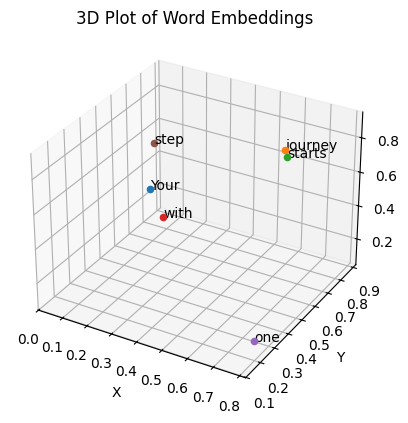

In [9]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

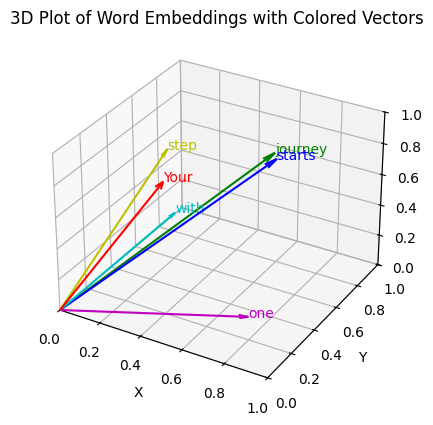

In [10]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


In [11]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [22]:
query = inputs[1] # second word
query.shape, inputs.shape

(torch.Size([3]), torch.Size([6, 3]))

In [31]:
query = inputs[1] # second word
attn_scores_2 = query @ inputs.T
attn_scores_2


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

In [32]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [33]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [34]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [40]:
attn_scores = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [42]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [45]:
attn_weights.sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

## IMPLEMENTING SELF ATTENTION WITH TRAINABLE WEIGHTS

In [77]:
import torch.nn as nn 

class SelfAttention_v2(nn.Module):
    
    def __init__(self, d_in, d_out, bias=False):
        super().__init__()
        self.W_q = nn.Linear(d_in, d_out, bias=bias)
        self.W_k = nn.Linear(d_in, d_out, bias=bias)
        self.W_v = nn.Linear(d_in, d_out, bias=bias)
        
    def forward(self, x):
        
        q = self.W_q(x)
        k = self.W_k(x)
        v = self.W_v(x)
        
        attn_scores = q @ k.T 
        att_weights = torch.softmax(attn_scores / (k.shape[-1]**.5), dim=-1)
        
        context_vec = att_weights @ v

        return context_vec

In [78]:
d_in = inputs.shape[-1]
d_out = 2

torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


## HIDING FUTURE WORDS WITH CAUSAL ATTENTION

In [82]:
import torch.nn as nn 

class SelfAttention_v3(nn.Module):
    
    def __init__(self, d_in, d_out, bias=False):
        super().__init__()
        self.W_q = nn.Linear(d_in, d_out, bias=bias)
        self.W_k = nn.Linear(d_in, d_out, bias=bias)
        self.W_v = nn.Linear(d_in, d_out, bias=bias)
        
    def forward(self, x):
        
        q = self.W_q(x)
        k = self.W_k(x)
        v = self.W_v(x)
        
        attn_scores = q @ k.T 
        att_weights = torch.softmax(attn_scores / (k.shape[-1]**.5), dim=-1)
        
        # context_vec = att_weights @ v

        return att_weights

In [83]:
d_in = inputs.shape[-1]
d_out = 2

torch.manual_seed(789)
sa_v2 = SelfAttention_v3(d_in, d_out)
print(sa_v2(inputs))

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)
